In [1]:
import os, random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image 
import glob
#import cv2 as cv
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms


## 1. Count the number of images of each folder

In [2]:
# count images
cwd = os.getcwd()
path_data = os.path.join(cwd, 'dataset')

# Iterate directory and count images amount
for path in os.listdir(path_data):
    count = 0
    for r, d, files in os.walk(os.path.join(path_data, path)):
        count += len(files)
        print(path, "folder :", count, "images")

fields folder : 45 images
roads folder : 108 images
test_images folder : 10 images


In [7]:
cwd = os.getcwd()
path_data = os.path.join(cwd, 'dataset')
path_data
glob.glob(path_data)

['c:\\Users\\Admin\\Documents\\Porfolio\\classifer-field-road\\dataset']

### 1.1. Check image porperties
BE CAREFUL: both jpg and jpeg files exit

In [84]:
# Print out the contents of one folder inside of the data folder
dir = os.path.join(path_data,"roads")
image_list = os.listdir(dir) 
image_list
# BE CAREFUL: both jpg and jpeg files, test only jpeg

['1.jpg',
 '10.jpg',
 '11.jpg',
 '12.jpg',
 '13.jpg',
 '14.jpg',
 '15.jpg',
 '16.jpg',
 '17.jpg',
 '18.jpg',
 '19.jpg',
 '2.jpg',
 '20.jpg',
 '21.jpg',
 '22.jpg',
 '23.jpg',
 '24.jpg',
 '25.jpg',
 '26.jpg',
 '27.jpg',
 '28.jpg',
 '29.jpg',
 '3.jpg',
 '30.jpg',
 '31.jpg',
 '32.jpg',
 '33.jpg',
 '34.jpg',
 '35.jpg',
 '36.jpg',
 '37.jpg',
 '38.jpg',
 '39.jpg',
 '4.jpg',
 '40.jpg',
 '41.jpg',
 '42.jpg',
 '43.jpg',
 '44.jpg',
 '45.jpg',
 '46.jpeg',
 '47.jpeg',
 '48.jpeg',
 '49.jpeg',
 '5.jpg',
 '50.jpeg',
 '51.jpeg',
 '52.jpeg',
 '53.jpeg',
 '6.jpg',
 '7.jpg',
 '8.jpg',
 '9.jpg',
 'city-6238228__340.jpg',
 'crops-1835847__340.jpg',
 'death-valley-4250244__340.jpg',
 'fog-6696312__340.jpg',
 'forest-1835019__340.jpg',
 'iceland-4957449__340.jpg',
 'istockphoto-490608724-612x612.jpg',
 'istockphoto-972849064-612x612.jpg',
 'pexels-photo-1038935.jpeg',
 'pexels-photo-1094545.jpeg',
 'pexels-photo-1197095.jpeg',
 'pexels-photo-125510.jpeg',
 'pexels-photo-1374295.jpeg',
 'pexels-photo-1471117.j

## 1.2. Print random images

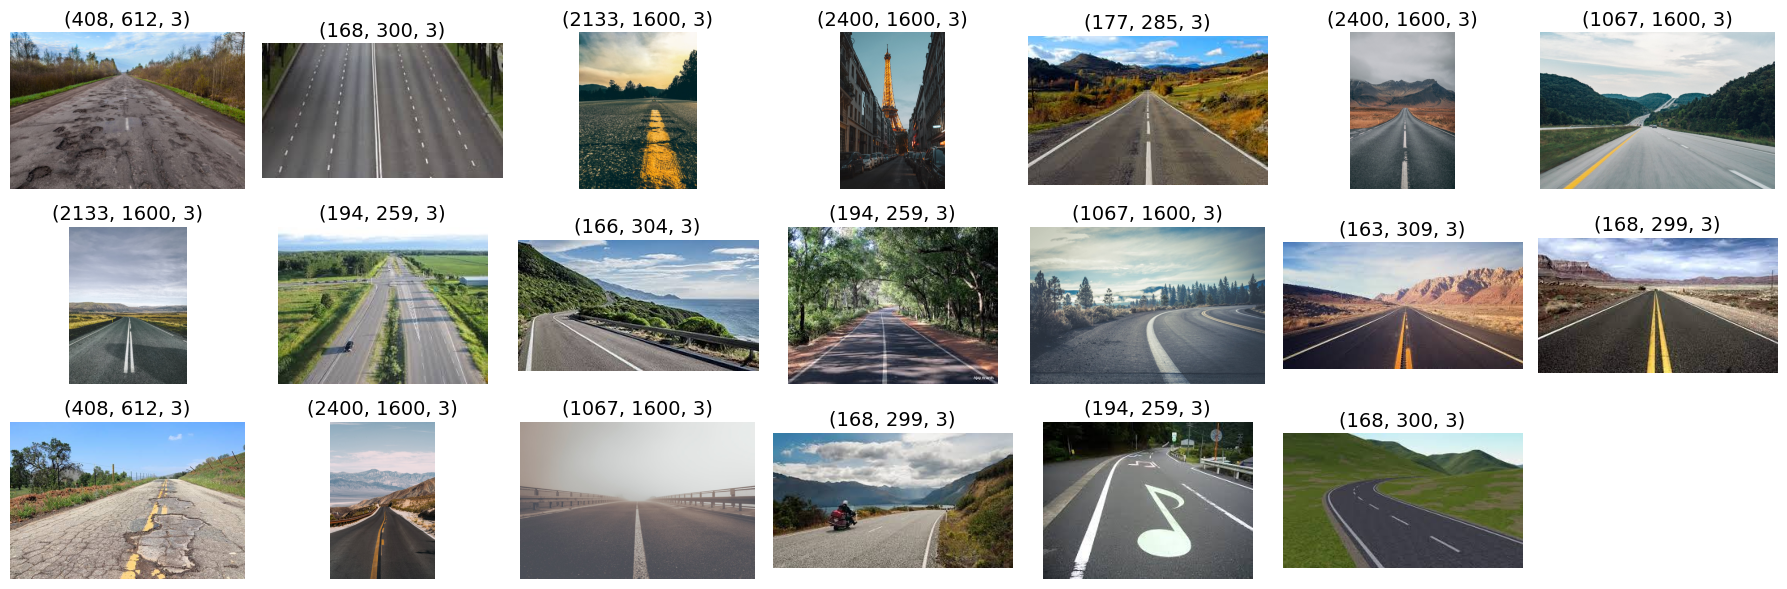

In [133]:
plt.figure(figsize=(18, 6))
rad = random.sample(image_list,20)

for sample_number in range(20):
    image_path = os.path.join(dir, rad[sample_number])
    image = mpimg.imread(image_path)
    ax = plt.subplot(3, 7, sample_number + 1)
    plt.imshow(image)
    plt.title(image.shape, fontsize=14)
    plt.axis("off")
    plt.tight_layout()


## 2. Calculate channel mean and std for normalization


In [32]:
import os
import numpy
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

PATH_DATA = 'dataset/test_images'
transform = transforms.Compose(
    [transforms.Resize((224, 224)),
     transforms.ToTensor()])

# import data
data = ImageFolder(
    root= PATH_DATA,
    transform= transform
)

data_loader = DataLoader(data,
                         batch_size=len(data),
                         shuffle=False, 
                         num_workers=0)

data_array = next(iter(data_loader))[0].numpy()
#data_array = numpy.array(data_loader)
# calculate mean and std

mean = numpy.mean(data_array, axis=(0,2,3))
std = numpy.std(data_array, axis=(0,2,3))
# print mean and std
print("mean and std before normalize:")
print("Mean of the image:", mean)
print("Std of the image:", std)

mean and std before normalize:
Mean of the image: [0.5374407 0.5403282 0.438259 ]
Std of the image: [0.24362235 0.2223072  0.2965594 ]


In [30]:
numpy.mean(data_array, axis =(0,2,3))

array([0.45512244, 0.46718585, 0.41516596], dtype=float32)

## 2. Argumentation
Try: - crop image into 5
     - random flip 
     - resize
     - normalize

In [90]:
image_path = os.path.join(dir, rad[2])
orig_image = Image.open(image_path)

torch.manual_seed(17)  

def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_image] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()



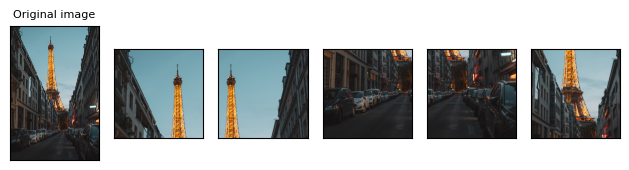

In [134]:
#cropper = T.AutoAugmentPolicy(orig_image)
#crops = [cropper(orig_image) for _ in range(4)]
#plot(cropper)
image_path = os.path.join(dir, rad[3])
orig_image = Image.open(image_path)
(top_left, top_right, bottom_left, bottom_right, center) = T.FiveCrop(size = (1024, 1024))(orig_image)
plot([top_left, top_right, bottom_left, bottom_right, center])